**To-do List**
- 

-***Graph before building pipeline***

-***Write notes for heatmaps for each position***

-***Use for loop through preprocessing***

-***Work on 2nd iteration for QB model***

-***Explain parameters***

-***Explain using bottom-down approach***

-***Check for nulls, duplicates***

-***Explain the changes I am making when creating features for each position***

-***Use checkpoints***

-***Articulate a model evaluation framework***

-***Fix read me file***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [6]:
dfAll = pd.read_csv("/Users/mychalortiz/Downloads/Brainstation/FantasyForecasts/notebooks/Dataframes/dfAll.csv")
qbs = pd.read_csv("/Users/mychalortiz/Downloads/Brainstation/FantasyForecasts/notebooks/Dataframes/qbs.csv")
rbs = pd.read_csv("/Users/mychalortiz/Downloads/Brainstation/FantasyForecasts/notebooks/Dataframes/rbs.csv")
wrs = pd.read_csv("/Users/mychalortiz/Downloads/Brainstation/FantasyForecasts/notebooks/Dataframes/wrs.csv")
tes = pd.read_csv("/Users/mychalortiz/Downloads/Brainstation/FantasyForecasts/notebooks/Dataframes/tes.csv")

- Transferring dataframes from previous notebook to the current notebook

In [7]:
qbs.head(5)

,Unnamed: 0,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,...,PASSING COMPLETION,PASSING ATTEMPTS,Opponent,Location,rank,DATE,Week,Free_Agent,did_not_play,Win_Loss
0,2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,...,21.0,25.0,Mia,Home,1.0,10-03-23,4,False,0,1
1,7,Anthony Richardson,Ind,QB,L 23-29,20.2,200.0,2.0,0.0,10.0,...,11.0,25.0,LAR,Home,2.0,10-03-23,4,False,0,0
2,8,Lamar Jackson,Bal,QB,W 28-3,17.9,186.0,2.0,0.0,9.0,...,15.0,19.0,Cle,Away,3.0,10-03-23,4,False,0,1
3,10,Justin Fields,Chi,QB,L 28-31,20.0,335.0,4.0,1.0,4.0,...,28.0,35.0,Den,Home,4.0,10-03-23,4,False,0,0
4,20,Jalen Hurts,Phi,QB,W 34-31,21.7,319.0,2.0,0.0,9.0,...,25.0,37.0,Wsh,Home,5.0,10-03-23,4,False,0,1


- Ensuring dataframes have been transfered

**Exploratory Data Analysis (Continued)**
- 

In [26]:
qbdidntplay = qbsM[qbsM['did_not_play'] == 1]
wrdidntplay = wrsM[wrsM['did_not_play'] == 1]

print(qbdidntplay.head(5))
print(wrdidntplay.head(5))

Empty DataFrame
Columns: [PLAYER NAME, PLAYER TEAM, PLAYER POSITION, STATUS, TOTAL, Opponent, Location, rank, DATE, Week, Free_Agent, did_not_play, Win_Loss, Name_Encoded, Team_Encoded, Opponent_Encoded, Home/Away_Encoded, fantasy_points_5_game_avg, passing_yds_5_game_avg, passing_td_5_game_avg, rushing_car_5_game_avg, rushing_yds_5_game_avg, rushing_tds_5_game_avg, season_fantasy_points, season_passing_yds, season_passing_td, season_rushing_car, season_rushing_yds, season_rushing_tds, season_fantasy_points_avg, season_passing_yards_avg, season_passing_td_avg, season_rushing_car_avg, season_rushing_yds_avg, season_rushing_tds_avg]
Index: []

[0 rows x 35 columns]
Empty DataFrame
Columns: [PLAYER NAME, PLAYER TEAM, PLAYER POSITION, STATUS, TOTAL, Opponent, Location, rank, DATE, Week, Free_Agent, did_not_play, Name_Encoded, Team_Encoded, Opponent_Encoded, Home/Away_Encoded, fantasy_points_5_game_avg, receiving_rec_5_game_avg, receiving_yds_5_game_avg, receiving_td_5_game_avg, rushing_car

- Ensuring that the rows with players who have not played have been removed from the dataframes

**Pre-Processing (Continued)**
- 

In [8]:
label_encoder = LabelEncoder()
#creating label encoder

dfList = {'qbs': qbs, 'rbs': rbs, 'wrs': wrs, 'tes': tes}
#creating list of fataframes

dfCopies = {}
#creating dictionary to hold copies of modified DataFrames

for name, df in dfList.items():
    df_copy = df.copy()
    #creating a copy of the dataframe
    df_copy['Name_Encoded'] = label_encoder.fit_transform(df['PLAYER NAME'])
    df_copy['Team_Encoded'] = label_encoder.fit_transform(df['PLAYER TEAM'])
    df_copy['Opponent_Encoded'] = label_encoder.fit_transform(df['Opponent'])
    df_copy['Home/Away_Encoded'] = label_encoder.fit_transform(df['Location'])
    #adding the encoded columns to the new dataframe
    globals()[f"{name}M"] = df_copy
    #creating a new dataframe for each DataFrame copy

wrsM.head(3)
#looking into 'wrsM' to make sure this process was completed succesfully

,Unnamed: 0,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,...,rank,DATE,Week,Free_Agent,did_not_play,Win_Loss,Name_Encoded,Team_Encoded,Opponent_Encoded,Home/Away_Encoded
0,1,A.J. Brown,Phi,WR,W 34-31,15.7,0.0,0.0,0.0,0.0,...,1.0,10-03-23,4,False,0,1,0,25,31,1
1,3,Stefon Diggs,Buf,WR,W 48-20,17.8,0.0,0.0,0.0,0.0,...,2.0,10-03-23,4,False,0,1,206,3,19,1
2,4,Nico Collins,Hou,WR,W 30-6,12.2,0.0,0.0,0.0,0.0,...,3.0,10-03-23,4,False,0,1,176,12,26,1


- Looping through a list of each dataframe and creating a copy, then adding encodod columns
- Encoding name, team, opponent, and location for each dataframe
- Made this slightly more complicated than it needed to be, but code was already written for several models using '{position df}M', and felt this would be easier than editing each line of code
    - Came back and changed the previous code to include a for loop in order to be more efficient

In [9]:
wrsM.head(5)

,Unnamed: 0,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,...,rank,DATE,Week,Free_Agent,did_not_play,Win_Loss,Name_Encoded,Team_Encoded,Opponent_Encoded,Home/Away_Encoded
0,1,A.J. Brown,Phi,WR,W 34-31,15.7,0.0,0.0,0.0,0.0,...,1.0,10-03-23,4,False,0,1,0,25,31,1
1,3,Stefon Diggs,Buf,WR,W 48-20,17.8,0.0,0.0,0.0,0.0,...,2.0,10-03-23,4,False,0,1,206,3,19,1
2,4,Nico Collins,Hou,WR,W 30-6,12.2,0.0,0.0,0.0,0.0,...,3.0,10-03-23,4,False,0,1,176,12,26,1
3,6,Puka Nacua,LAR,WR,W 29-23,14.5,0.0,0.0,0.0,0.0,...,4.0,10-03-23,4,False,0,1,183,17,13,0
4,13,DJ Moore,Chi,WR,L 28-31,12.3,0.0,0.0,0.0,0.0,...,5.0,10-03-23,4,False,0,0,46,5,9,1


In [10]:
JA = qbsM[qbsM['PLAYER NAME'] == 'Josh Allen']
#creating df to view rows where 'PLAYER NAME' = 'Josh Allen'
JA.head(5)

,Unnamed: 0,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,PROJ,PASSING YDS,PASSING TD,PASSING INT,RUSHING CAR,...,rank,DATE,Week,Free_Agent,did_not_play,Win_Loss,Name_Encoded,Team_Encoded,Opponent_Encoded,Home/Away_Encoded
0,2,Josh Allen,Buf,QB,W 48-20,20.9,320.0,4.0,0.0,4.0,...,1.0,10-03-23,4,False,0,1,41,3,19,1
64,1111,Josh Allen,Buf,QB,L 16-22,21.1,236.0,1.0,3.0,6.0,...,23.0,09-12-23,1,False,0,0,41,3,24,0
89,2034,Josh Allen,Buf,QB,W 37-3,20.8,218.0,1.0,1.0,3.0,...,8.0,09-26-23,3,False,0,1,41,3,31,0
125,3022,Josh Allen,Buf,QB,L 20-25,20.7,359.0,2.0,1.0,4.0,...,2.0,10-10-23,5,False,0,0,41,3,14,1
166,4034,Josh Allen,Buf,QB,W 32-6,18.9,275.0,3.0,1.0,5.0,...,6.0,11-21-23,11,False,0,1,41,3,24,1


- Creating a dataframe to view rows where the player is Josh Allen to ensure the label encoding has ran smoothly

In [11]:
dfMList = {'rbsM': rbsM, 'wrsM': wrsM, 'tesM': tesM}
#creating a dictionary that maps names to dataframes

for name, dfM in dfMList.items():
    dfM = dfM.sort_values(['PLAYER NAME', 'DATE'])
    #sorting each dataframe by name and date

    dfM['fantasy_points_5_game_avg'] = dfM.groupby('PLAYER NAME')['TOTAL'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    dfM['receiving_rec_5_game_avg'] = dfM.groupby('PLAYER NAME')['RECEIVING REC'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    dfM['receiving_yds_5_game_avg'] = dfM.groupby('PLAYER NAME')['RECEIVING YDS'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    dfM['receiving_td_5_game_avg'] = dfM.groupby('PLAYER NAME')['RECEIVING TD'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    dfM['rushing_car_5_game_avg'] = dfM.groupby('PLAYER NAME')['RUSHING CAR'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    dfM['rushing_yds_5_game_avg'] = dfM.groupby('PLAYER NAME')['RUSHING YDS'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    dfM['rushing_td_5_game_avg'] = dfM.groupby('PLAYER NAME')['RUSHING TD'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    #getting the 5-game rolling averages for fantasy points and other stats

    dfM['season_fantasy_points'] = dfM.groupby('PLAYER NAME')['TOTAL'].cumsum() - dfM['TOTAL']
    dfM['season_receiving_rec'] = dfM.groupby('PLAYER NAME')['RECEIVING REC'].cumsum() - dfM['RECEIVING REC']
    dfM['season_receiving_yds'] = dfM.groupby('PLAYER NAME')['RECEIVING YDS'].cumsum() - dfM['RECEIVING YDS']
    dfM['season_receiving_td'] = dfM.groupby('PLAYER NAME')['RECEIVING TD'].cumsum() - dfM['RECEIVING TD']
    dfM['season_rushing_car'] = dfM.groupby('PLAYER NAME')['RUSHING CAR'].cumsum() - dfM['RUSHING CAR']
    dfM['season_rushing_yds'] = dfM.groupby('PLAYER NAME')['RUSHING YDS'].cumsum() - dfM['RUSHING YDS']
    dfM['season_rushing_tds'] = dfM.groupby('PLAYER NAME')['RUSHING TD'].cumsum() - dfM['RUSHING TD']
    #getting cumulative stats and subtracting the current week's stats

    dfM['season_fantasy_points_avg'] = dfM['season_fantasy_points'] / (dfM.groupby('PLAYER NAME').cumcount() + 1)
    dfM['season_receiving_rec_avg'] = dfM['season_receiving_rec'] / (dfM.groupby('PLAYER NAME').cumcount() + 1)
    dfM['season_receiving_yards_avg'] = dfM['season_receiving_yds'] / (dfM.groupby('PLAYER NAME').cumcount() + 1)
    dfM['season_receiving_td_avg'] = dfM['season_receiving_td'] / (dfM.groupby('PLAYER NAME').cumcount() + 1)
    dfM['season_rushing_car_avg'] = dfM['season_rushing_car'] / (dfM.groupby('PLAYER NAME').cumcount() + 1)
    dfM['season_rushing_yds_avg'] = dfM['season_rushing_yds'] / (dfM.groupby('PLAYER NAME').cumcount() + 1)
    dfM['season_rushing_tds_avg'] = dfM['season_rushing_tds'] / (dfM.groupby('PLAYER NAME').cumcount() + 1)
    #getting the cumulative averages

    dfM.drop(columns=['Unnamed: 0', 'PROJ', 'PASSING YDS', 'PASSING TD', 'RUSHING CAR', 'PASSING INT', 'RUSHING YDS', 
                      'RUSHING TD', 'RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR', 
                      'MISC 2PC', 'MISC FUML', 'MISC TD', 'PASSING COMPLETION', 'PASSING ATTEMPTS', 'Win_Loss'], inplace=True)
    #dropping columns with the current week's statistics
    
    dfMList[name] = dfM
    #ensuring that the dictionary always holds the most updated version of each dataframe during the loop

rbsM = dfMList['rbsM']
wrsM = dfMList['wrsM']
tesM = dfMList['tesM']
#making the dataframes standalone variables so that referencing the dictionary in the future is not necessary

- Looping through the running back, wide receiver, and tight end modeling dataframes and creating new features based on historical data
    - Only looping through these dataframes because the quarterback modeling dataframes will be structured differently
    - Creating new features for statistics specific to these positions, such as rushing, receiving, and touchdown averages
- Creating features such as 5-game rolling averages and season cumulative averages up to the current date
- Doing this in order to give the models more data that can help improve their predictive power and accuracy
- Removed the current weeks statistics
    - In order to predict the fantasy points for a certain week, the model can not have access to that weeks statistics
    - By removing this data, the model relies on only historical data in order to make predictions, as would be the case in a real world scenario where future performance is unknown

In [12]:
rbsM.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,TOTAL,Opponent,Location,rank,DATE,Week,...,season_rushing_car,season_rushing_yds,season_rushing_tds,season_fantasy_points_avg,season_receiving_rec_avg,season_receiving_yards_avg,season_receiving_td_avg,season_rushing_car_avg,season_rushing_yds_avg,season_rushing_tds_avg
1264,AJ Dillon,GB,RB,W 33-10,2.7,Min,Away,65.0,01-02-24,17,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
149,AJ Dillon,GB,RB,W 38-20,5.6,Chi,Away,42.0,09-12-23,1,...,7.0,27.0,0.0,1.350000,0.000000,0.000000,0.0,3.500000,13.500000,0.0
1336,AJ Dillon,GB,RB,L 24-25,7.3,Atl,Away,33.0,09-19-23,2,...,20.0,46.0,0.0,2.766667,0.666667,5.666667,0.0,6.666667,15.333333,0.0
276,AJ Dillon,GB,RB,W 18-17,3.3,NO,Home,58.0,09-26-23,3,...,35.0,101.0,0.0,3.900000,0.750000,6.250000,0.0,8.750000,25.250000,0.0
72,AJ Dillon,GB,RB,L 20-34,1.1,Det,Home,73.0,10-03-23,4,...,46.0,134.0,0.0,3.780000,0.600000,5.000000,0.0,9.200000,26.800000,0.0


- Ensuring that the changes have been made to the dataframes

In [13]:
qbsM = qbsM.sort_values(['PLAYER NAME', 'DATE'])
#sorting by player and dates

qbsM['fantasy_points_5_game_avg'] = qbsM.groupby('PLAYER NAME')['TOTAL'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
qbsM['passing_yds_5_game_avg'] = qbsM.groupby('PLAYER NAME')['PASSING YDS'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
qbsM['passing_td_5_game_avg'] = qbsM.groupby('PLAYER NAME')['PASSING TD'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
qbsM['rushing_car_5_game_avg'] = qbsM.groupby('PLAYER NAME')['RUSHING CAR'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
qbsM['rushing_yds_5_game_avg'] = qbsM.groupby('PLAYER NAME')['RUSHING YDS'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
qbsM['rushing_tds_5_game_avg'] = qbsM.groupby('PLAYER NAME')['RUSHING TD'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
#calculating 5-game rolling averages for fantasy points, passing yards, and passing touchdowns

qbsM['season_fantasy_points'] = qbs.groupby('PLAYER NAME')['TOTAL'].cumsum() - qbsM['TOTAL']
qbsM['season_passing_yds'] = qbs.groupby('PLAYER NAME')['PASSING YDS'].cumsum() - qbsM['PASSING YDS']
qbsM['season_passing_td'] = qbs.groupby('PLAYER NAME')['PASSING TD'].cumsum() - qbsM['PASSING TD']
qbsM['season_rushing_car'] = qbs.groupby('PLAYER NAME')['RUSHING CAR'].cumsum() - qbsM['RUSHING CAR']
qbsM['season_rushing_yds'] = qbs.groupby('PLAYER NAME')['RUSHING YDS'].cumsum() - qbsM['RUSHING CAR']
qbsM['season_rushing_tds'] = qbs.groupby('PLAYER NAME')['RUSHING TD'].cumsum() - qbsM['RUSHING TD']
#calculating sum for season stats up to the current date, subracting the current weeks stats

qbsM['season_fantasy_points_avg'] = qbsM['season_fantasy_points'] / (qbsM.groupby('PLAYER NAME').cumcount() + 1)
qbsM['season_passing_yards_avg'] = qbsM['season_passing_yds'] / (qbsM.groupby('PLAYER NAME').cumcount() + 1)
qbsM['season_passing_td_avg'] = qbsM['season_passing_td'] / (qbsM.groupby('PLAYER NAME').cumcount() + 1)
qbsM['season_rushing_car_avg'] = qbsM['season_rushing_car'] / (qbsM.groupby('PLAYER NAME').cumcount() + 1)
qbsM['season_rushing_yds_avg'] = qbsM['season_rushing_yds'] / (qbsM.groupby('PLAYER NAME').cumcount() + 1)
qbsM['season_rushing_tds_avg'] = qbsM['season_rushing_tds'] / (qbsM.groupby('PLAYER NAME').cumcount() + 1)
#calculating average for season stats up to the current date

qbsM = qbsM.drop(columns=['Unnamed: 0', 'PROJ', 'PASSING YDS', 'PASSING TD', 'RUSHING CAR', 'PASSING INT', 'RUSHING YDS', 'RUSHING TD', 'RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR', 'MISC 2PC', 'MISC FUML', 'MISC TD', 'PASSING COMPLETION', 'PASSING ATTEMPTS'])
#dropping current game stats

- Performing the same operations on the quarterback modeling dataframe, instead with quarterback specific statistics this time

In [14]:
qbsM.head(5)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,TOTAL,Opponent,Location,rank,DATE,Week,...,season_passing_td,season_rushing_car,season_rushing_yds,season_rushing_tds,season_fantasy_points_avg,season_passing_yards_avg,season_passing_td_avg,season_rushing_car_avg,season_rushing_yds_avg,season_rushing_tds_avg
335,AJ McCarron,Cin,QB,W 31-14,0.80,Cle,Home,34.0,01-09-24,18,...,0.0,0.0,0.0,0.0,-0.04,-1.0,0.0,0.0,0.0,0.0
300,AJ McCarron,Cin,QB,W 34-14,-0.04,Ind,Home,38.0,12-12-23,14,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
75,Aaron Rodgers,NYJ,QB,W 22-16,0.00,Buf,Home,36.0,09-12-23,1,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
468,Aidan O'Connell,LV,QB,L 20-23,20.26,Ind,Away,9.0,01-02-24,17,...,5.0,15.0,9.0,1.0,74.64,1596.0,5.0,15.0,9.0,1.0
312,Aidan O'Connell,LV,QB,W 27-14,17.86,Den,Home,11.0,01-09-24,18,...,1.0,5.0,5.0,1.0,16.18,444.5,0.5,2.5,2.5,0.5


- Ensuring that the changes have been made to the dataframe

**Exploratory Data Analysis (Part 2)**
- 
Continuing exploratory data analysis after preprocessing

In [34]:
for name, dfM in dfList.items():
    print(dfM.isnull().sum())

Unnamed: 0            0
PLAYER NAME           0
PLAYER TEAM           0
PLAYER POSITION       0
STATUS                0
PROJ                  0
PASSING YDS           0
PASSING TD            0
PASSING INT           0
RUSHING CAR           0
RUSHING YDS           0
RUSHING TD            0
RECEIVING REC         0
RECEIVING YDS         0
RECEIVING TD          0
RECEIVING TAR         0
MISC 2PC              0
MISC FUML             0
MISC TD               0
TOTAL                 0
PASSING COMPLETION    0
PASSING ATTEMPTS      0
Opponent              0
Location              0
rank                  0
DATE                  0
Week                  0
Free_Agent            0
did_not_play          0
Win_Loss              0
dtype: int64
Unnamed: 0            0
PLAYER NAME           0
PLAYER TEAM           0
PLAYER POSITION       0
STATUS                0
PROJ                  0
PASSING YDS           0
PASSING TD            0
PASSING INT           0
RUSHING CAR           0
RUSHING YDS           0
RUS

- Using for loop to iterate through dataframes and check for nulls
- No nulls found

In [35]:
for name, dfM in dfList.items():
    print(dfM.duplicated().sum())

0
0
0
0


- Using for loop to iterate through dataframes and check for duplicates
- No duplicates found

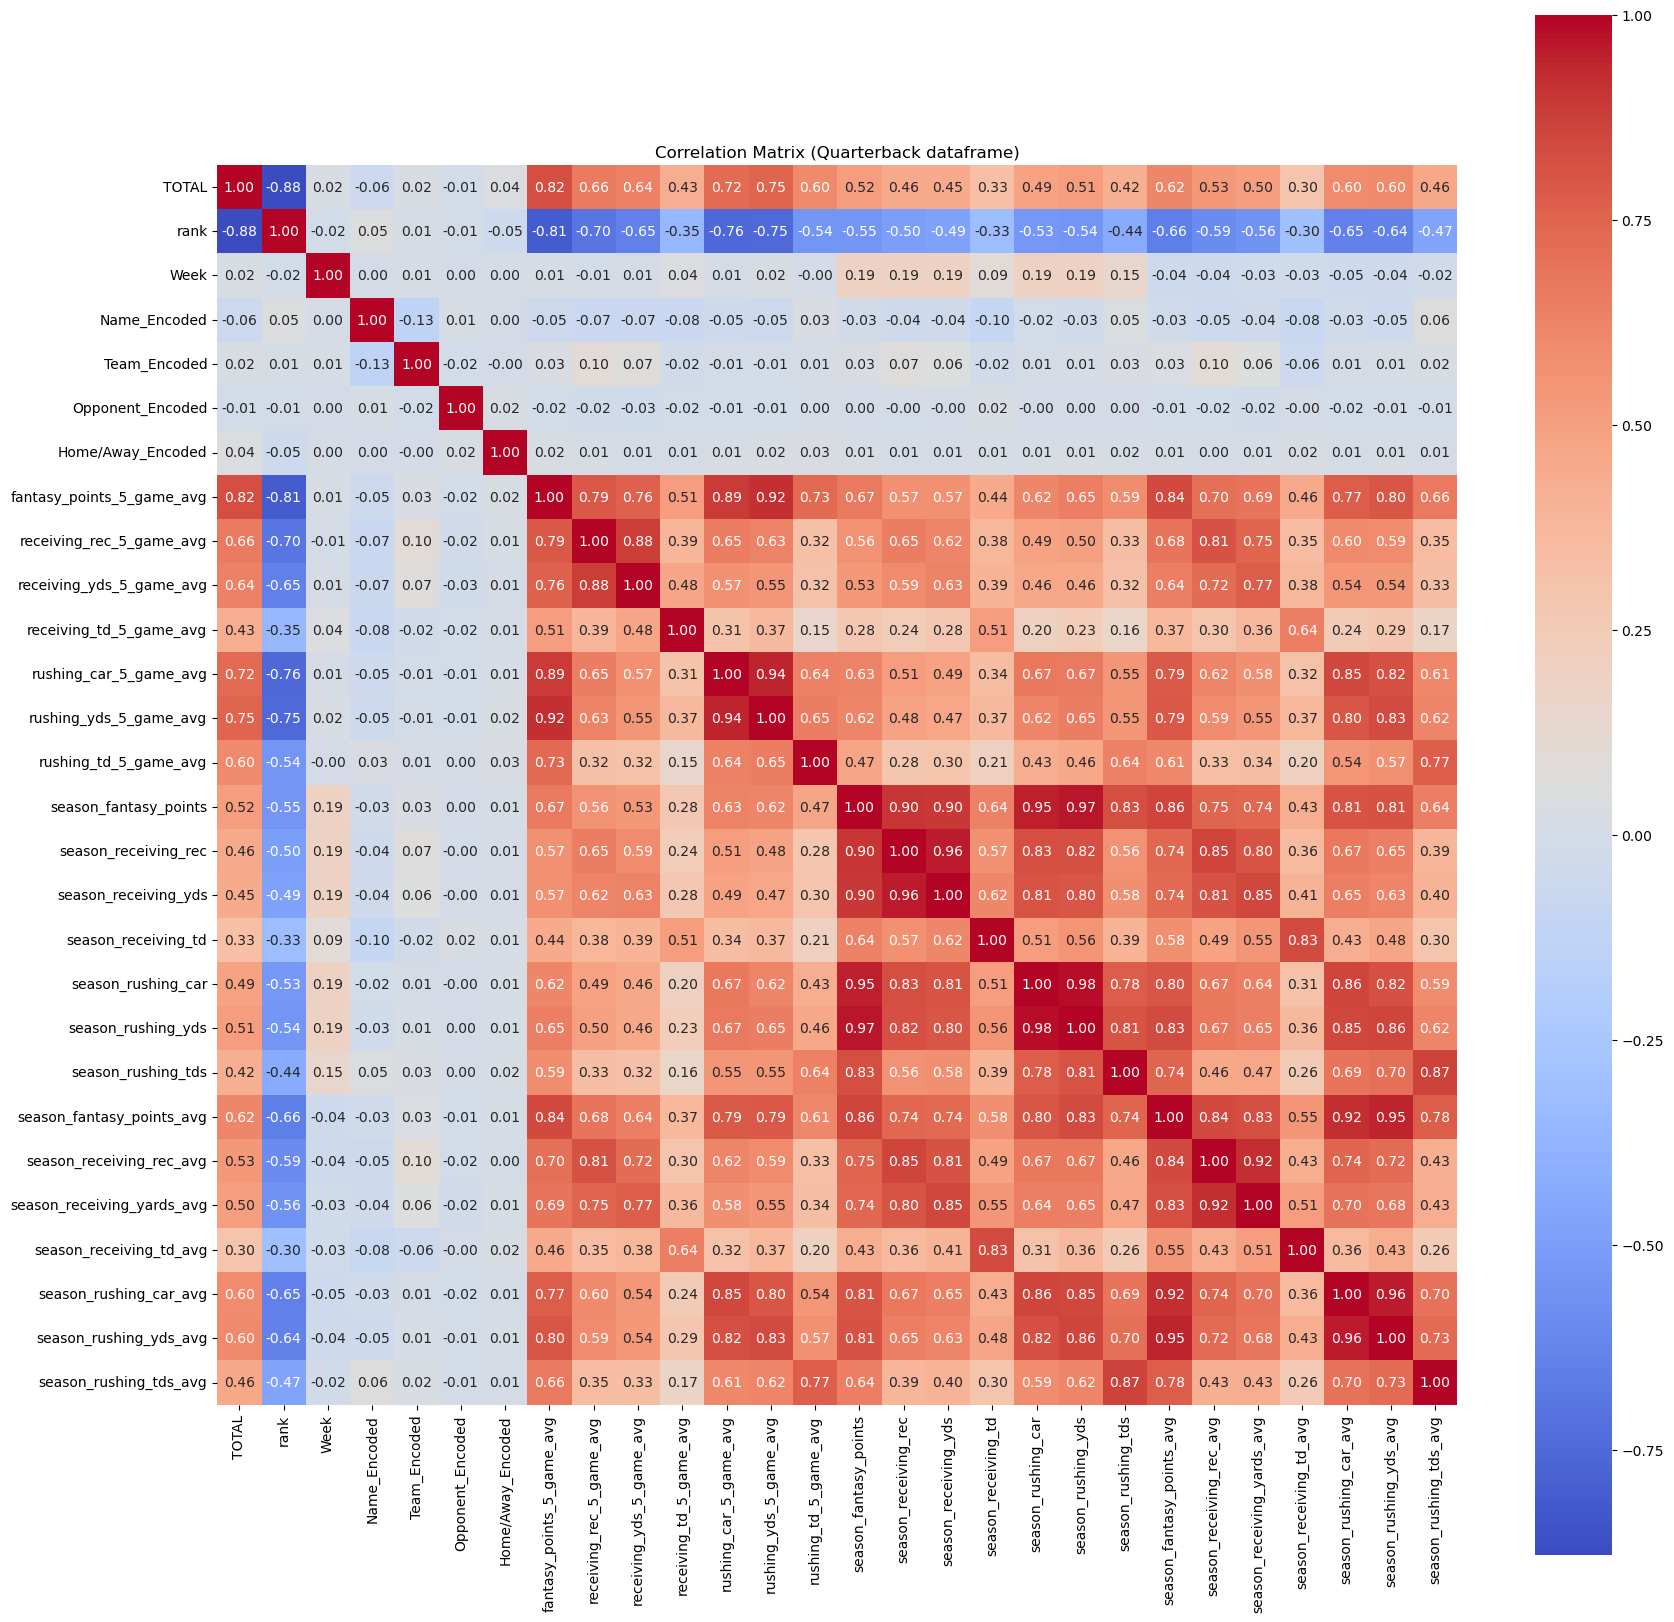

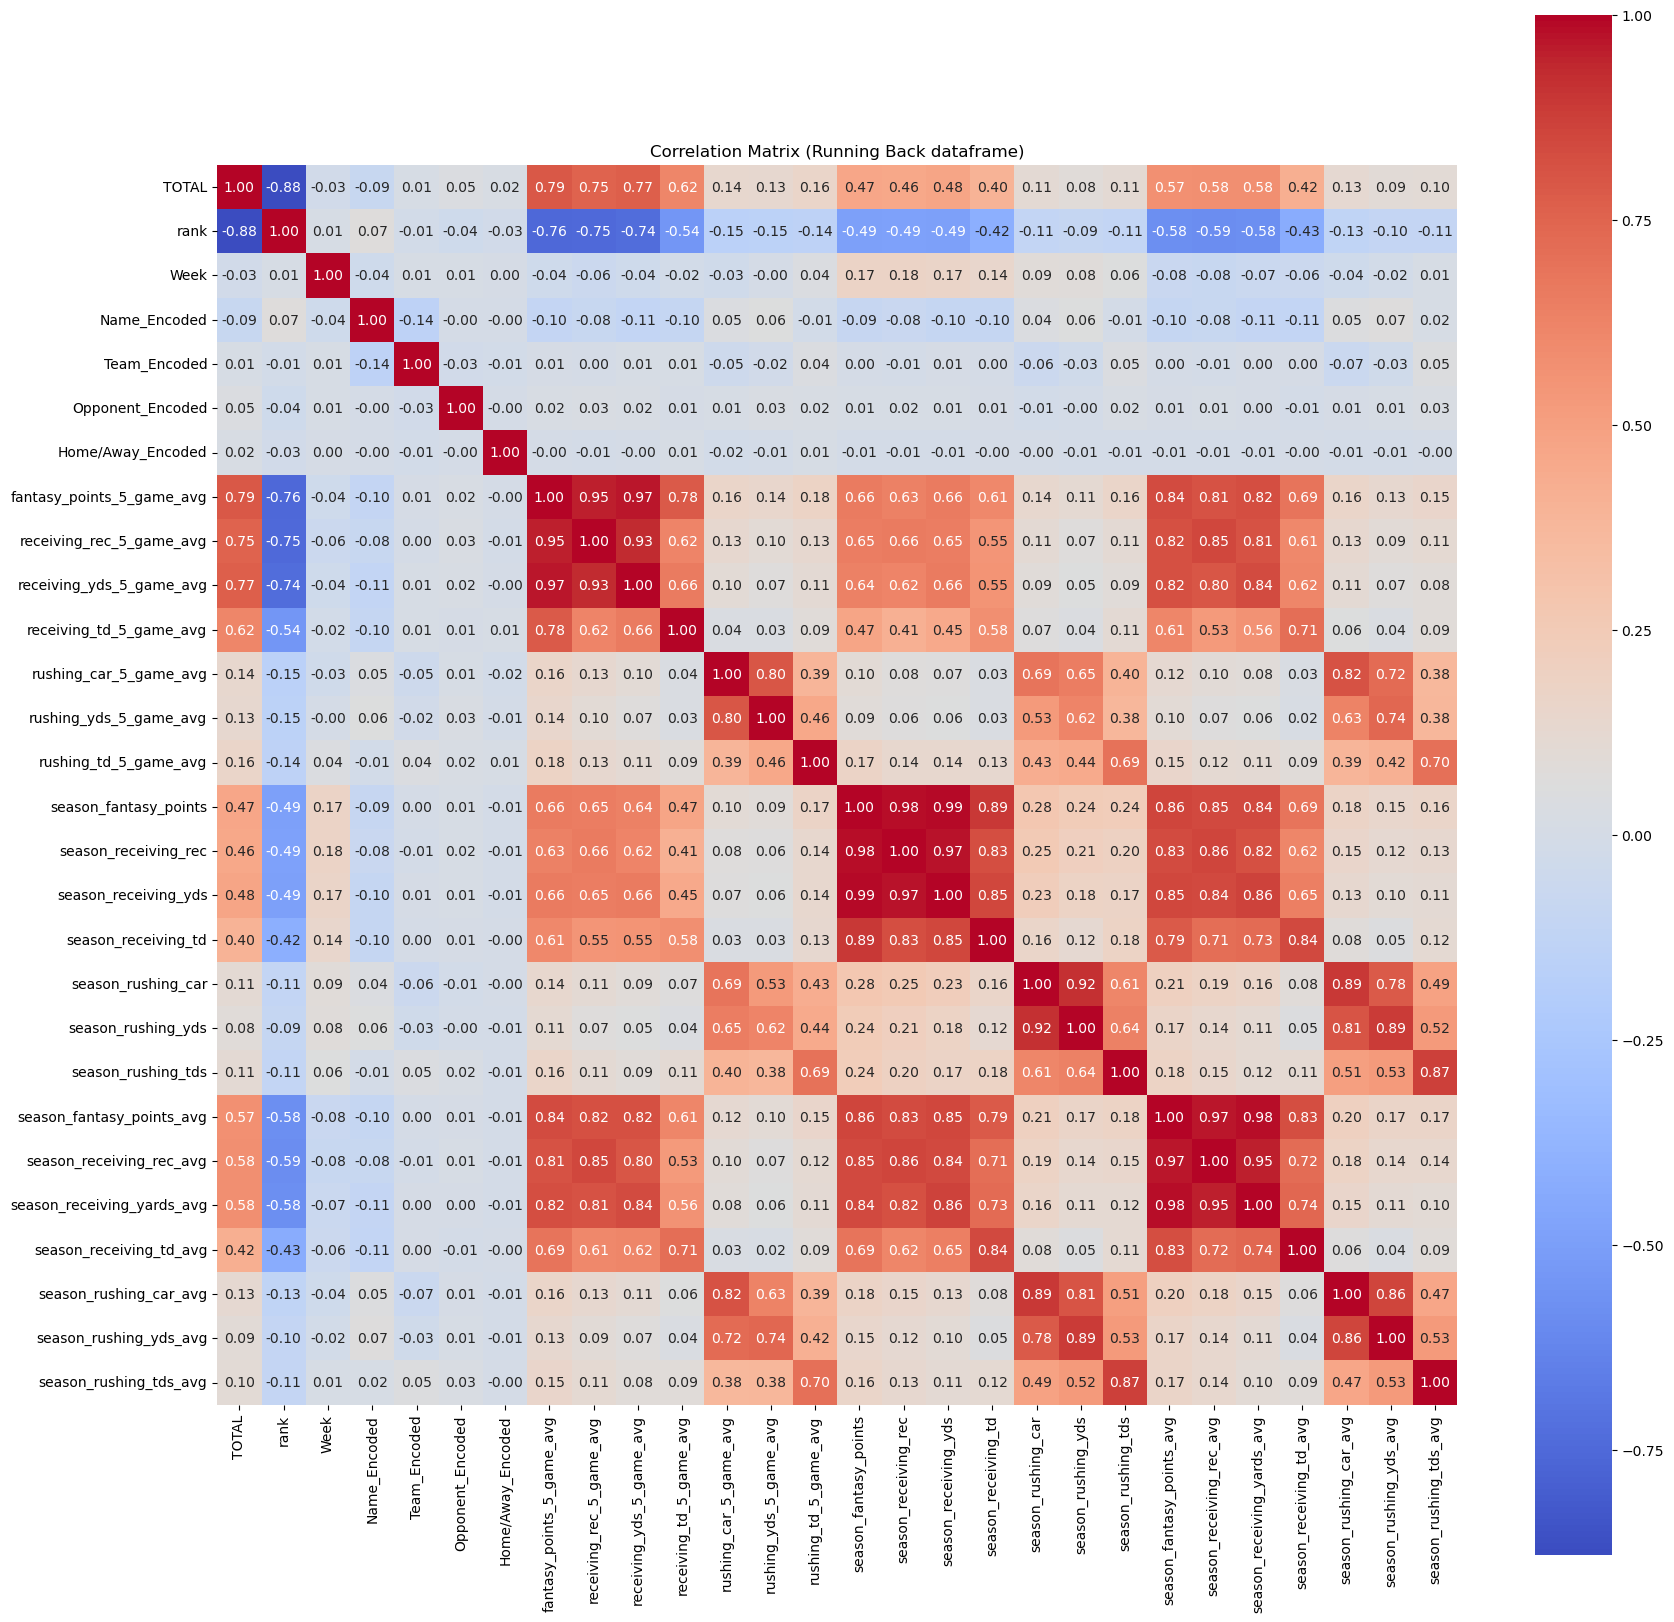

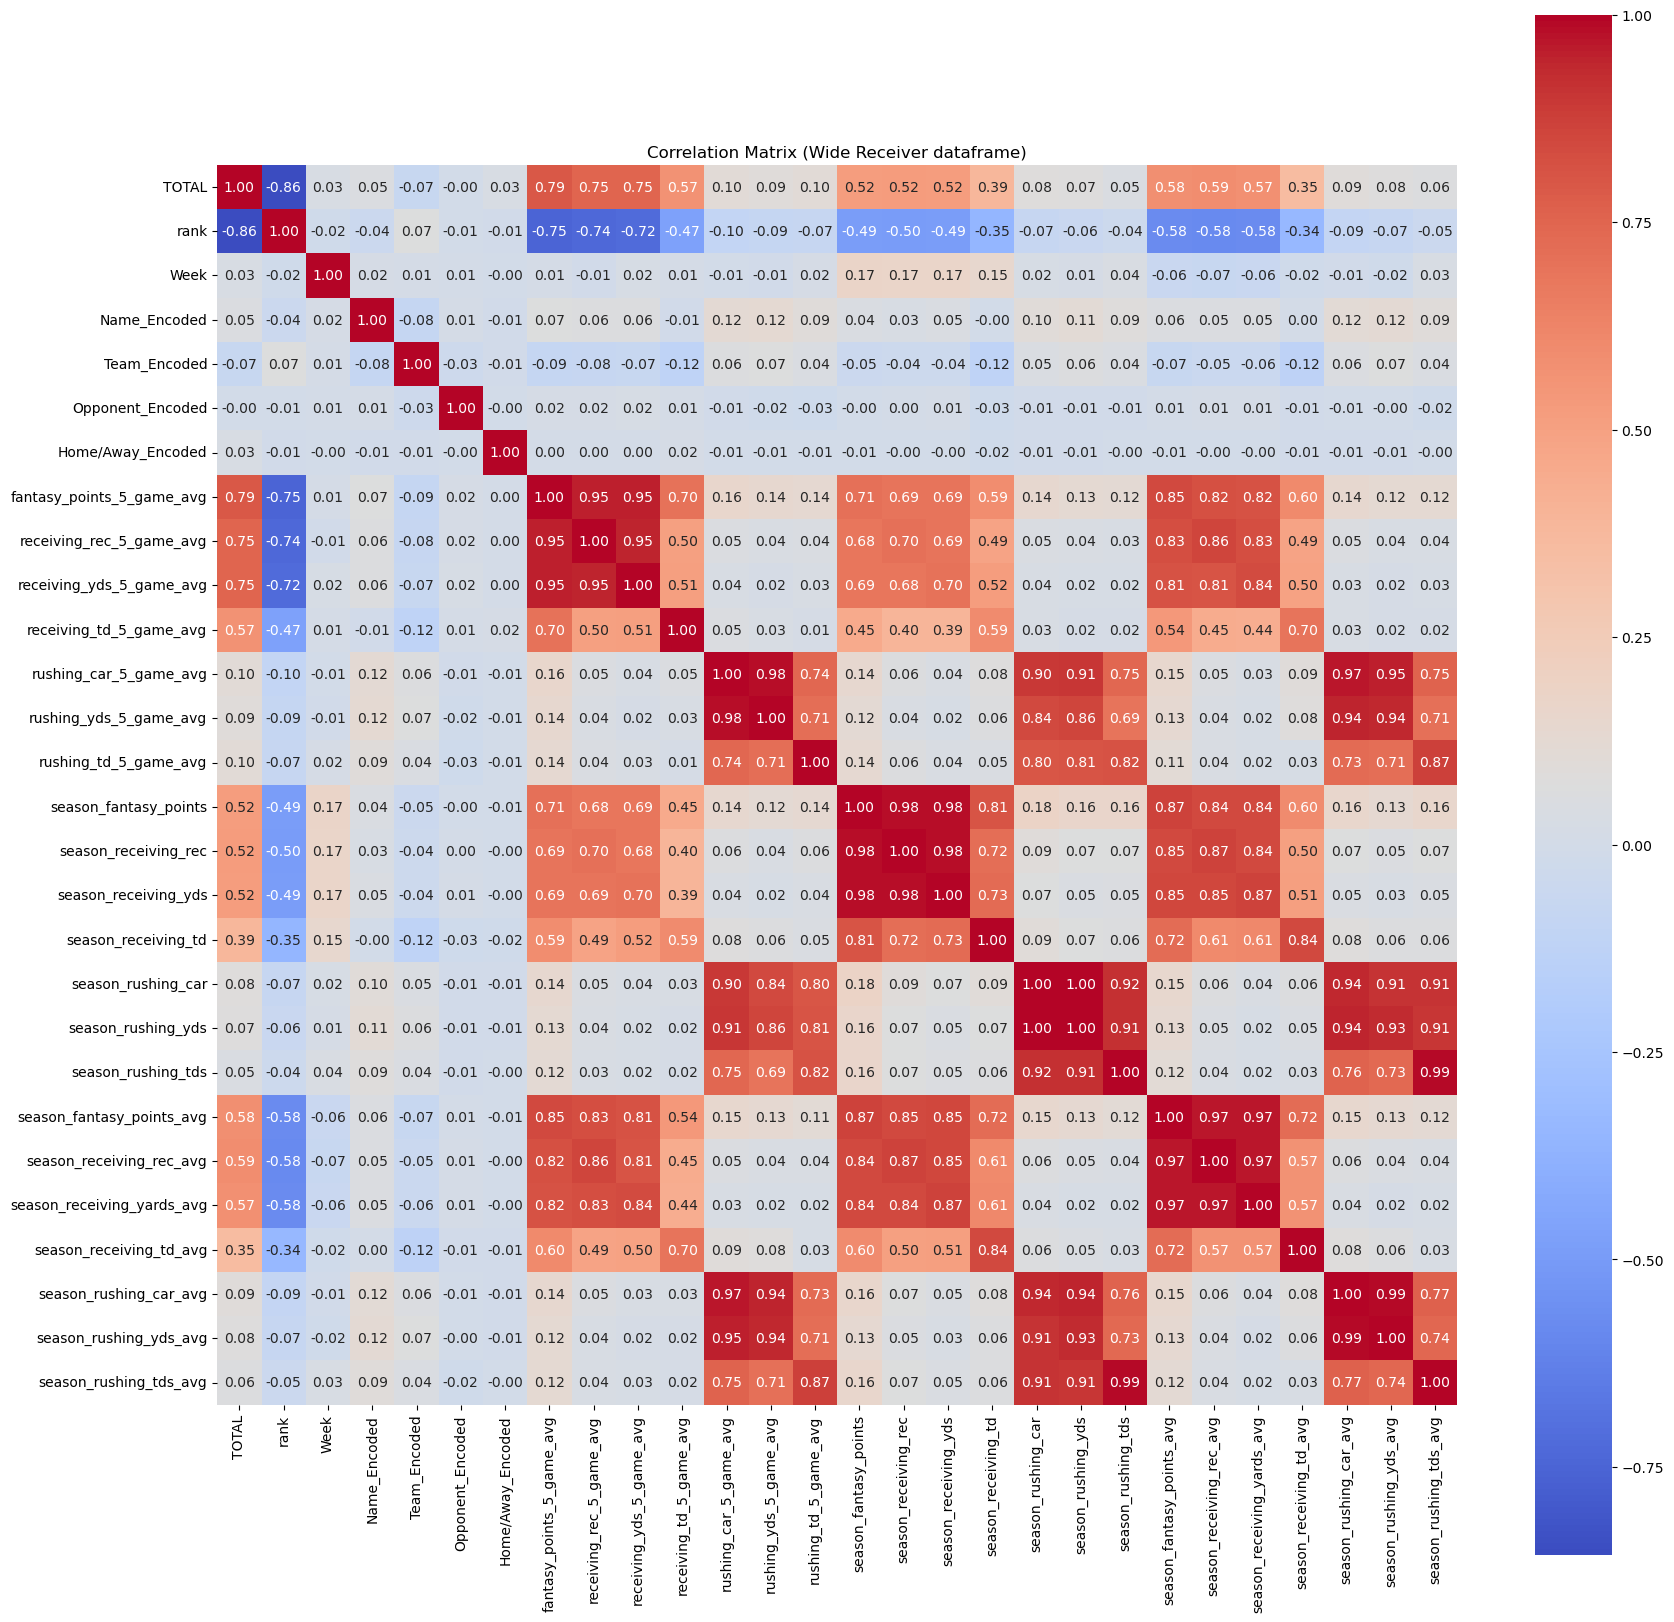

In [49]:
dfNames = ['Quarterback', 'Running Back', 'Wide Receiver', 'Tight End']
#creating list for position names
#doing this allows me to use the position name for the title of each heatmap
#using 'name' within dfList would display 'qbsM dataframe'

for i, (name, dfM) in enumerate(dfMList.items()):
    dfC = dfM.select_dtypes(include='number').drop(columns=['did_not_play'])

    correlation_matrix = dfC.corr()

    plt.figure(figsize=(20, 20))
    plt.title(f'Correlation Matrix ({dfNames[i]} dataframe)')
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.show()

- Displaying correlation heatmap for each dataframe

ADD QBS
- 

**Baseline Ridge Regression (QB)**
- 

Building a ridge regression model using a top-down approach to predict fantasy points for quarterbacks, as a baseline model

Using ridge because almost all features are expected to contribute to 'Total', and also to reduce the risk of overfitting

**Building Pipe**

In [16]:
estimators = [('imputer', SimpleImputer()),
              ('normalise', StandardScaler()),
              ('reduce_dim', PCA()),
              ('ridge', Ridge(alpha = 1.0))]

pipe = Pipeline(estimators)

paramGrid = {'imputer__strategy': ['mean', 'median', 'most_frequent', 'constant'],
             'reduce_dim__n_components': [0.99, 0.95, 0.90, 0.85],
             'ridge__alpha': [0.01, 0.1, 1, 10, 100],
             'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
             'ridge__fit_intercept': [True, False]}

- Building linear regression pipeline

***ADD NOTES/CHANGE TO {DF}M***
- 

**1st Iteration**

In [17]:
Xqb = qbsM.select_dtypes(include = 'number').drop(columns=['TOTAL'])

yqb = qbsM['TOTAL']
#assigning X and Y

- Assigning X and y

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Xqb, yqb, test_size = .20, random_state = 14)
#train, test, split

grid_search = GridSearchCV(pipe, paramGrid, cv=5, scoring='neg_mean_squared_error')
#performing grid search using 5 fold cross validation

grid_search.fit(X_train, y_train)
#fitting grid search

print("Best parameters:", grid_search.best_params_)
qbRidge = grid_search.best_estimator_
#setting best estimator to 'qbRidge'

y_pred = qbRidge.predict(X_test)
#getting predictions

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
#printing best parameters, r-squared, and mean absolute error

Best parameters: {'imputer__strategy': 'mean', 'reduce_dim__n_components': 0.99, 'ridge__alpha': 1, 'ridge__fit_intercept': True, 'ridge__solver': 'saga'}
R-squared: 0.9186266808205132
Mean Absolute Error (MAE): 2.0184609468915173


- Train test splitting
    - Using 20% test size
- Creating and fitting model
- Performing grid search
    - Optimal parameters
        - 'imputer__strategy': 'mean'
        - 'reduce_dim__n_components': 0.99
        - 'ridge__alpha': 1
        - 'ridge__fit_intercept': True
        - 'ridge__solver': 'sparse_cg'
- R-squared
    - 91.87% of the variance in the data is explained by the model
    - This is a solid value
- Mean Absolute Error
    - On average, the model’s predictions of NFL fantasy points deviate from the actual values by ~2 points

**2nd Iteration**

In [19]:
#WORK ON 2ND ITERATION

In [20]:
input_data = pd.DataFrame({
    'rank' : [4],
    'Week': [5],
    'did_not_play': [0],
    'Win_Loss': [15.8],
    'Name_Encoded' : [41],
    'fantasy_points_5_game_avg' : [22.4],
    'passing_yds_5_game_avg' : [283],
    'passing_td_5_game_avg' : [2.2],
    'rushing_car_5_game_avg' : [4.2],
    'rushing_yds_5_game_avg' : [17.2],
    'season_fantasy_points' : [112],
    'season_passing_yds' : [1415],
    'season_passing_td' : [11],
    'season_rushing_car' : [21],
    'season_rushing_yds' : [86],
    'season_fantasy_points_avg' : [22.4],
    'season_passing_yards_avg' : [283],
    'season_passing_td_avg' : [2.2],
    'season_rushing_car_avg' : [4.2],
    'season_rushing_yds_avg' : [17.2],
})

# Make prediction
prediction = qbRidge.predict(input_data)

print(f'Predicted Fantasy Points: , {prediction[0]}')

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Home/Away_Encoded
- Opponent_Encoded
- Team_Encoded
- rushing_tds_5_game_avg
- season_rushing_tds
- ...


- Testing the model once again by inputing fake data to view model prediction

**Baseline Ridge Regression (RB)**
- 

Building a ridge regression model using a top-down approach to predict fantasy points for running backs, as a baseline model

Using ridge because almost all features are expected to contribute to 'Total', and also to reduce the risk of overfitting

In [43]:
rbsM.head(2)

,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,TOTAL,Opponent,Location,rank,DATE,Week,...,season_rushing_car,season_rushing_yds,season_rushing_tds,season_fantasy_points_avg,season_receiving_rec_avg,season_receiving_yards_avg,season_receiving_td_avg,season_rushing_car_avg,season_rushing_yds_avg,season_rushing_tds_avg
1264,AJ Dillon,GB,RB,W 33-10,2.7,Min,Away,65.0,01-02-24,17,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
149,AJ Dillon,GB,RB,W 38-20,5.6,Chi,Away,42.0,09-12-23,1,...,7.0,27.0,0.0,1.35,0.0,0.0,0.0,3.5,13.5,0.0


In [44]:
Xrb = rbsM.select_dtypes(include = 'number').drop(columns=['TOTAL'])

yrb = rbsM['TOTAL']
#assigning X and Y

In [45]:
Xrb.head(5)

,rank,Week,did_not_play,Name_Encoded,Team_Encoded,Opponent_Encoded,Home/Away_Encoded,fantasy_points_5_game_avg,receiving_rec_5_game_avg,receiving_yds_5_game_avg,...,season_rushing_car,season_rushing_yds,season_rushing_tds,season_fantasy_points_avg,season_receiving_rec_avg,season_receiving_yards_avg,season_receiving_td_avg,season_rushing_car_avg,season_rushing_yds_avg,season_rushing_tds_avg
1264,65.0,17,0,0,11,20,0,2.700,0.00,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
149,42.0,1,0,0,11,5,0,4.150,1.00,8.500000,...,7.0,27.0,0.0,1.350000,0.000000,0.000000,0.0,3.500000,13.500000,0.0
1336,33.0,2,0,0,11,1,0,5.200,1.00,8.333333,...,20.0,46.0,0.0,2.766667,0.666667,5.666667,0.0,6.666667,15.333333,0.0
276,58.0,3,0,0,11,22,1,4.725,0.75,6.250000,...,35.0,101.0,0.0,3.900000,0.750000,6.250000,0.0,8.750000,25.250000,0.0
72,73.0,4,0,0,11,10,1,4.000,0.60,5.000000,...,46.0,134.0,0.0,3.780000,0.600000,5.000000,0.0,9.200000,26.800000,0.0


In [46]:
X_train, X_test, y_train, y_test = train_test_split(Xrb, yrb, test_size = .20, random_state = 14)
#train, test, split

grid_search = GridSearchCV(pipe, paramGrid, cv=5, scoring='neg_mean_squared_error')
#performing grid search using 5 fold cross validation

grid_search.fit(X_train, y_train)
#fitting grid search

print("Best parameters:", grid_search.best_params_)
rbRidge= grid_search.best_estimator_
#setting best estimator to 'rbRidge'

y_pred = rbRidge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
#printing best parameters, r-squared, and mean absolute error

Best parameters: {'imputer__strategy': 'mean', 'reduce_dim__n_components': 0.99, 'ridge__alpha': 10, 'ridge__fit_intercept': True, 'ridge__solver': 'sparse_cg'}
R-squared: 0.8098972675636639
Mean Absolute Error (MAE): 2.281315066478425


- Moderate metrics
    - ~81% of the variance is accounted for by the model
    - Model’s predictions deviate from the actual values by ~2.2 points on average

***2nd Iteration***

After receiving moderate metrics, this iteration will remove features that have very little correlation with the target variable ('TOTAL'), or are strongly correlate with others.

**FINISH NOTES**
- 

In [47]:
Xrb.head(1)

,rank,Week,did_not_play,Name_Encoded,Team_Encoded,Opponent_Encoded,Home/Away_Encoded,fantasy_points_5_game_avg,receiving_rec_5_game_avg,receiving_yds_5_game_avg,...,season_rushing_car,season_rushing_yds,season_rushing_tds,season_fantasy_points_avg,season_receiving_rec_avg,season_receiving_yards_avg,season_receiving_td_avg,season_rushing_car_avg,season_rushing_yds_avg,season_rushing_tds_avg
1264,65.0,17,0,0,11,20,0,2.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
Xrb2 = rbsM.select_dtypes(include = 'number').drop(columns=['TOTAL', 'receiving_rec_5_game_avg', 'season_receiving_rec', 'Team_Encoded', 'Opponent_Encoded', 'Home/Away_Encoded'])
#dropping columns from the list of independent variables

In [51]:
X_train, X_test, y_train, y_test = train_test_split(Xrb2, yrb, test_size = .20, random_state = 14)
#train, test, split

grid_search = GridSearchCV(pipe, paramGrid, cv=5, scoring='neg_mean_squared_error')
#performing grid search using 5 fold cross validation

grid_search.fit(X_train, y_train)
#fitting grid search

print("Best parameters:", grid_search.best_params_)
rbRidge= grid_search.best_estimator_
#setting best estimator to 'rbRidge'

y_pred = rbRidge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
#printing best parameters, r-squared, and mean absolute error

Best parameters: {'imputer__strategy': 'mean', 'reduce_dim__n_components': 0.99, 'ridge__alpha': 10, 'ridge__fit_intercept': True, 'ridge__solver': 'sag'}
R-squared: 0.8139329098011028
Mean Absolute Error (MAE): 2.2251303362604165


**ADD NOTES**
- 

**Baseline Ridge Regression (WR)**
- 

Building a ridge regression model using a top-down approach to predict fantasy points for Wide Receivers, as a baseline model

Using ridge because almost all features are expected to contribute to 'Total', and also to reduce the risk of overfitting

In [71]:
wrsM.head(2) 

,Unnamed: 0,PLAYER NAME,PLAYER TEAM,PLAYER POSITION,STATUS,TOTAL,Opponent,Location,rank,DATE,...,season_rushing_car,season_rushing_yds,season_rushing_tds,season_fantasy_points_avg,season_receiving_rec_avg,season_receiving_yards_avg,season_receiving_td_avg,season_rushing_car_avg,season_rushing_yds_avg,season_rushing_tds_avg
1912,12179,A.J. Brown,Phi,WR,L 31-35,9.3,Ari,Home,45.0,01-02-24,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1384,8714,A.J. Brown,Phi,WR,L 10-27,-0.1,NYG,Away,163.0,01-09-24,...,0.0,0.0,0.0,4.65,2.0,26.5,0.0,0.0,0.0,0.0


In [86]:
Xwr = wrsM.select_dtypes(include = 'number').drop(columns=['TOTAL'])

ywr = wrsM['TOTAL']
#assigning X and Y

In [87]:
Xwr.head(2)

,rank,Week,did_not_play,Win_Loss,Name_Encoded,fantasy_points_5_game_avg,receiving_rec_5_game_avg,receiving_yds_5_game_avg,receiving_td_5_game_avg,rushing_car_5_game_avg,...,season_rushing_car,season_rushing_yds,season_rushing_tds,season_fantasy_points_avg,season_receiving_rec_avg,season_receiving_yards_avg,season_receiving_td_avg,season_rushing_car_avg,season_rushing_yds_avg,season_rushing_tds_avg
1912,45.0,17,0,0,0,9.3,4.0,53.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1384,163.0,18,0,0,0,4.6,2.5,31.0,0.0,0.0,...,0.0,0.0,0.0,4.65,2.0,26.5,0.0,0.0,0.0,0.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(Xwr, ywr, test_size = .20, random_state = 14)
#train, test, split

grid_search = GridSearchCV(pipe, paramGrid, cv=5, scoring='neg_mean_squared_error')
#performing grid search using 5 fold cross validation

grid_search.fit(X_train, y_train)
#fitting grid search

print("Best parameters:", grid_search.best_params_)
rbRidge = grid_search.best_estimator_
#setting best estimator to 'rbRidge'

y_pred = rbRidge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
#printing best parameters, r-squared, and mean absolute error

Best parameters: {'imputer__strategy': 'most_frequent', 'reduce_dim__n_components': 0.99, 'ridge__alpha': 10, 'ridge__fit_intercept': True, 'ridge__solver': 'sag'}
R-squared: 0.8383186002093566
Mean Absolute Error (MAE): 2.197626439542853


- Moderate metrics
    - ~83.83% of the variance is accounted for by the model
    - Model’s predictions deviate from the actual values by ~2.2 points on average

***2nd Iteration***

**Baseline Ridge Regression (TE)**
- 

Building a ridge regression model using a top-down approach to predict fantasy points for tight ends, as a baseline model

Using ridge because almost all features are expected to contribute to 'Total', and also to reduce the risk of overfitting

In [90]:
Xte = tesM.select_dtypes(include = 'number').drop(columns=['TOTAL'])

yte = tesM['TOTAL']
#assigning X and Y

In [92]:
X_train, X_test, y_train, y_test = train_test_split(Xwr, ywr, test_size = .20, random_state = 14)
#train, test, split

grid_search = GridSearchCV(pipe, paramGrid, cv=5, scoring='neg_mean_squared_error')
#performing grid search using 5 fold cross validation

grid_search.fit(X_train, y_train)
#fitting grid search

print("Best parameters:", grid_search.best_params_)
rbRidge = grid_search.best_estimator_
#setting best estimator to 'rbRidge'

y_pred = rbRidge.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
#printing best parameters, r-squared, and mean absolute error

Best parameters: {'imputer__strategy': 'mean', 'reduce_dim__n_components': 0.99, 'ridge__alpha': 10, 'ridge__fit_intercept': True, 'ridge__solver': 'lsqr'}
R-squared: 0.8420162646295586
Mean Absolute Error (MAE): 2.177342121854982


- Moderate metrics
    - ~84.20% of the variance is accounted for by the model
    - Model’s predictions deviate from the actual values by ~2.1 points on average